In [1]:
%matplotlib inline
import matplotlib.pylab

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# The special thing about time series is that data points relate to one another...they are not independent
So we can to compare them and relate them. One way to do this is to look at how they change. For example, we can 'difference' a time series

In [41]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'D', periods = 20))
ts_lagged = ts.shift()

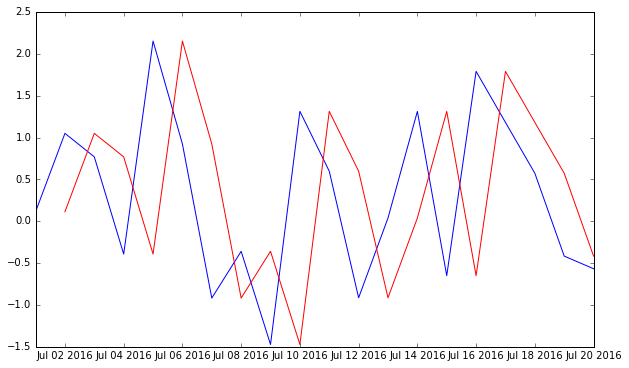

In [42]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

In [6]:
ts = pd.Series(np.random.randn(20), pd.date_range('7/1/16', freq = 'H', periods = 20))
ts_lagged = ts.shift(5)

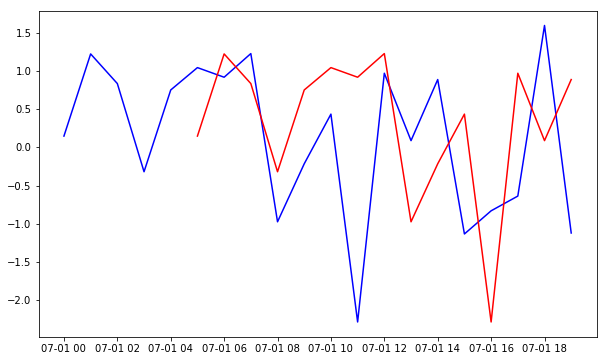

In [7]:
plt.plot(ts, color = 'blue')
plt.plot(ts_lagged, color = 'red')

### Query: how can I shift my time series 'into the future' instead of into the past?

In [ ]:
# %load snippets/shift_future.py


# Window functions give you moving aggregate measures of a time series

In [9]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample()

In [14]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('5/1/2016', freq = 'D', periods = 600), columns = ['A', 'B', 'C'])

In [15]:
df.head()

,A,B,C
2016-05-01,-1.313321,-0.515511,1.487691
2016-05-02,0.393588,0.042115,-1.739745
2016-05-03,0.293877,0.789996,2.156583
2016-05-04,-1.426034,-1.591446,0.769417
2016-05-05,-0.002116,-0.170923,-1.802833


In [16]:
df.index

DatetimeIndex(['2016-05-01', '2016-05-02', '2016-05-03', '2016-05-04',
               '2016-05-05', '2016-05-06', '2016-05-07', '2016-05-08',
               '2016-05-09', '2016-05-10',
               ...
               '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-15',
               '2017-12-16', '2017-12-17', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21'],
              dtype='datetime64[ns]', length=600, freq='D')

In [17]:
r = df.rolling(window = 20)
r

Rolling [window=20,center=False,axis=0]

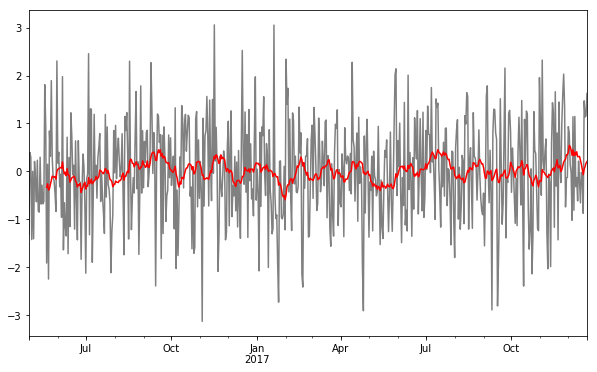

In [18]:
df['A'].plot(color = 'gray')
r.mean()['A'].plot(color = 'red')

### Try out some of these options with .rolling()

r.agg, r.apply, r.count, r.max, r.median, r.name, r.quantile, r.kurt, 
r.aggregate, r.std, r.skew, r.sum, r.var

### What about a custom function?

In [21]:
# %load snippets/custom_rolling.py
df.rolling(window= 10,center =False).apply(lambda x: x[1]/x[2])[0:20]

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,1.339297,0.053311,-0.806714


In [22]:
df.rolling(window= 10,center =False).apply(lambda x: x.max()- x.min())[0:20]

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,1.819622,3.292792,3.959415


### What if I want to generate a rolling window function of monthly data from daily data?

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  from ipykernel import kernelapp as app


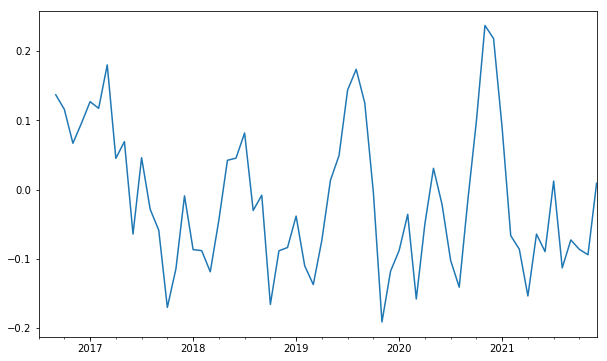

In [27]:
ts = pd.Series(np.random.randn(2000), pd.date_range('7/1/16', freq = 'D', periods = 2000))
ts.resample('M').rolling(window= 3).mean().plot()

In [ ]:
# %load snippets/resample_rolling.py

## Expanding windows

In [36]:
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C
2016-05-02,0.270060,-1.469776,0.439426
2016-05-03,0.036559,-1.503361,1.122728
2016-05-04,-0.005551,-1.031087,0.916300
2016-05-05,0.155788,-0.790037,0.957493


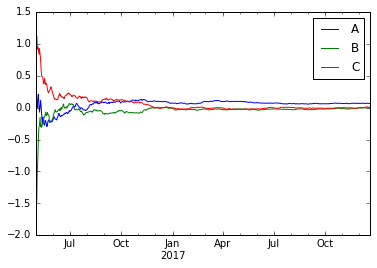

In [41]:
df.expanding(min_periods = 1).mean().plot()

# Try

(1) How can you perform an exponentially weight moving average rather than a window function? (hint: look for ewma + pandas docs)

(2) When would you use an expanding window vs. a rolling window?

(3) Write a custom function to repace .quantile(.5) function for a moving average

(4) How would you compute more than one aggregation function on a moving window function at the same time? 

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  app.launch_new_instance()


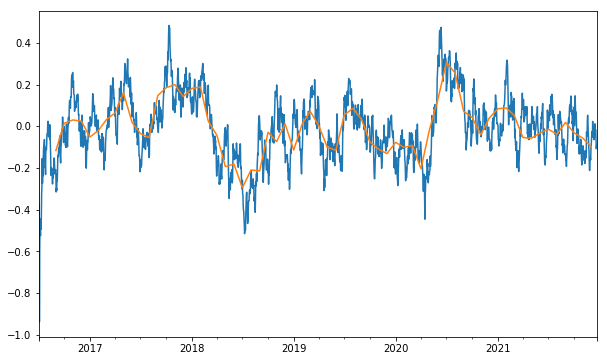

In [30]:
#1
ts = pd.Series(np.random.randn(2000), pd.date_range('7/1/16', freq = 'D', periods = 2000))
ts.ewm(span=50,freq = 'D',min_periods=0,adjust=True).mean().plot()
ts.resample('M').rolling(window= 3).mean().plot()

In [42]:
#3
r= df.rolling(window=20)
r.apply(lambda x: sorted(x)[int(round(len(x)*0.5))])

,A,B,C
2016-05-01,NaN,NaN,NaN
2016-05-02,NaN,NaN,NaN
2016-05-03,NaN,NaN,NaN
2016-05-04,NaN,NaN,NaN
2016-05-05,NaN,NaN,NaN
2016-05-06,NaN,NaN,NaN
2016-05-07,NaN,NaN,NaN
2016-05-08,NaN,NaN,NaN
2016-05-09,NaN,NaN,NaN
2016-05-10,NaN,NaN,NaN


In [43]:
#4
r= df.rolling(window = 20)
r.agg(['mean','sum'])

A                    B                    C          
                mean        sum      mean        sum      mean       sum
2016-05-01       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-02       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-03       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-04       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-05       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-06       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-07       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-08       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-09       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-10       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-11       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-12       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-13       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-14       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-15       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-16       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-17       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-18       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-19       NaN        NaN       NaN        NaN       NaN       NaN
2016-05-20 -0.333468  -6.669363 -0.466318  -9.326367  0.111899  2.237985
2016-05-21 -0.260468  -5.209358 -0.458916  -9.178318  0.033156  0.663128
2016-05-22 -0.392661  -7.853211 -0.435810  -8.716209  0.030046  0.600920
2016-05-23 -0.365251  -7.305027 -0.492495  -9.849900 -0.094386 -1.887713
2016-05-24 -0.278134  -5.562677 -0.444028  -8.880555 -0.084851 -1.697028
2016-05-25 -0.183241  -3.664817 -0.481108  -9.622158  0.027566  0.551325
2016-05-26 -0.099608  -1.992152 -0.469362  -9.387241 -0.000825 -0.016498
2016-05-27 -0.116794  -2.335879 -0.449237  -8.984741 -0.059540 -1.190791
2016-05-28 -0.117747  -2.354948 -0.478263  -9.565253  0.018620  0.372407
2016-05-29 -0.108643  -2.172865 -0.391736  -7.834720 -0.060320 -1.206392
2016-05-30 -0.162150  -3.243008 -0.311687  -6.233735 -0.020656 -0.413111
...              ...        ...       ...        ...       ...       ...
2017-11-22  0.123606   2.472123  0.368693   7.373862 -0.110085 -2.201691
2017-11-23 -0.004371  -0.087427  0.340635   6.812698 -0.117551 -2.351024
2017-11-24  0.033285   0.665704  0.283665   5.673298 -0.103982 -2.079641
2017-11-25  0.111639   2.232788  0.402336   8.046720 -0.145230 -2.904593
2017-11-26  0.192218   3.844370  0.461628   9.232567 -0.109953 -2.199052
2017-11-27  0.226587   4.531748  0.399781   7.995614 -0.054478 -1.089569
2017-11-28  0.252695   5.053891  0.402697   8.053931 -0.069546 -1.390912
2017-11-29  0.347760   6.955200  0.431032   8.620641 -0.046181 -0.923628
2017-11-30  0.344235   6.884702  0.524023  10.480454 -0.173235 -3.464704
2017-12-01  0.402074   8.041488  0.471196   9.423929 -0.141483 -2.829659
2017-12-02  0.541559  10.831176  0.435951   8.719028 -0.139582 -2.791631
2017-12-03  0.519192  10.383843  0.414137   8.282734 -0.122373 -2.447454
2017-12-04  0.446607   8.932143  0.431792   8.635838  0.010153  0.203063
2017-12-05  0.334971   6.699426  0.443111   8.862212  0.035777  0.715547
2017-12-06  0.450453   9.009053  0.376344   7.526871  0.067203  1.344064
2017-12-07  0.326634   6.532681  0.384522   7.690438  0.064981  1.299629
2017-12-08  0.399368   7.987367  0.236093   4.721854  0.055247  1.104940
2017-12-09  0.343282   6.865646  0.256121   5.122428 -0.030587 -0.611736
2017-12-10  0.408410   8.168203  0.189659   3.793188 -0.197474 -3.949483
2017-12-11  0.305076   6.101511  0.178013   3.560266 -0.107453 -2.149069
2017-12-12  0.308615   6.172306  0.073024   1.460474 -0.164803 -3.296070
2017-12-13  0.311472   6.229437  0.058422   1.168434 -0.141525 -2.830509
2017